# Content 
    ## Data preporcessing
    ## Decision tree model consturction
    ## Stastical information for Top-N feature that is greater than 0 for feature importance
    ## Visualisation topN 
    ##  Filling in zero before regression analysis
    ## Shapiro-Wilk test to conform normality for all features
    ## Regression analysis 
    ## Signifciant difference for the feature in the rank list by using Wilconx signed rank test

In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

Utility function

In [2]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


import data

In [3]:
variedinputCSV = '/Users/mingshi/Desktop/DissertationProject/Week12/final-merge-all-varied-first-pass.csv'
constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'

data = pd.read_csv(variedinputCSV)


# Tranform any laughter categories,such as "[laugh]-null Discouse " into Ambiguous

In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check

Session id Participant id  Start Time - ms  End Time - ms  \
3793         S07       M002_S07           313464         314672   
4157         S07           P017           313354         313477   
11815        S20       M003_S20           352456         353354   
12055        S20           P043           352456         353354   

       Duration - ms       CV - merge - M - L - S concise merge type  \
3793            1208            [laugh]- Mirthful                NaN   
4157             123            [laugh]- Mirthful                NaN   
11815            898  [laugh]-Discourse Discourse                NaN   
12055            898  [laugh]-Discourse Discourse                NaN   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
3793                         2.714319                         0.637168   
4157                         0.358312                         0.400000   
11815                        1.428272                         0.609756   
12055                        3.388762                         0.073171   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
3793                          0.044248  ...                      6.649413   
4157                          0.800000  ...                      0.000000   
11815                         0.963415  ...                      7.864002   
12055                         0.000000  ...                      2.763081   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
3793                       0.440901                     2.615150   
4157                       0.000000                     0.659052   
11815                      0.465479                     3.375833   
12055                      0.237982                     2.439080   

       mfcc_sma_de[14]_peakMeanMeanDist  mfcc_sma_de[14]_peakMeanRel  \
3793                           2.911237                    -8.832350   
4157                           0.576954                     8.027590   
11815                          3.546390                   -14.276783   
12055                          2.662603                   -10.763992   

       mfcc_sma_de[14]_minRangeRel  mfcc_sma_de[14]_meanRisingSlope  \
3793                      0.532110                       112.562195   
4157                      0.000000                        31.933825   
11815                     0.449389                       195.873825   
12055                     0.654777                       128.354919   

       mfcc_sma_de[14]_stddevRisingSlope  mfcc_sma_de[14]_meanFallingSlope  \
3793                           47.665657                        124.298988   
4157                            0.000000                        -65.864784   
11815                         109.870750                        121.174484   
12055                          76.674301                         83.960907   

       mfcc_sma_de[14]_stddevFallingSlope  
3793                           104.417198  
4157                             0.000000  
11815                           58.349670  
12055                           56.204716  

[4 rows x 6380 columns]

# Data preporcessing

In [5]:
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    

In [6]:
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check

Empty DataFrame
Columns: [Session id, Participant id, Start Time - ms, End Time - ms, Duration - ms, CV - merge - M - L - S, concise merge type, audspec_lengthL1norm_sma_range, audspec_lengthL1norm_sma_maxPos, audspec_lengthL1norm_sma_minPos, audspec_lengthL1norm_sma_quartile1, audspec_lengthL1norm_sma_quartile2, audspec_lengthL1norm_sma_quartile3, audspec_lengthL1norm_sma_iqr1-2, audspec_lengthL1norm_sma_iqr2-3, audspec_lengthL1norm_sma_iqr1-3, audspec_lengthL1norm_sma_percentile1.0, audspec_lengthL1norm_sma_percentile99.0, audspec_lengthL1norm_sma_pctlrange0-1, audspec_lengthL1norm_sma_stddev, audspec_lengthL1norm_sma_skewness, audspec_lengthL1norm_sma_kurtosis, audspec_lengthL1norm_sma_meanSegLen, audspec_lengthL1norm_sma_maxSegLen, audspec_lengthL1norm_sma_minSegLen, audspec_lengthL1norm_sma_segLenStddev, audspec_lengthL1norm_sma_upleveltime25, audspec_lengthL1norm_sma_upleveltime50, audspec_lengthL1norm_sma_upleveltime75, audspec_lengthL1norm_sma_upleveltime90, audspec_lengthL1norm_sma_risetime, audspec_lengthL1norm_sma_leftctime, audspec_lengthL1norm_sma_lpgain, audspec_lengthL1norm_sma_lpc0, audspec_lengthL1norm_sma_lpc1, audspec_lengthL1norm_sma_lpc2, audspec_lengthL1norm_sma_lpc3, audspec_lengthL1norm_sma_lpc4, audspecRasta_lengthL1norm_sma_range, audspecRasta_lengthL1norm_sma_maxPos, audspecRasta_lengthL1norm_sma_minPos, audspecRasta_lengthL1norm_sma_quartile1, audspecRasta_lengthL1norm_sma_quartile2, audspecRasta_lengthL1norm_sma_quartile3, audspecRasta_lengthL1norm_sma_iqr1-2, audspecRasta_lengthL1norm_sma_iqr2-3, audspecRasta_lengthL1norm_sma_iqr1-3, audspecRasta_lengthL1norm_sma_percentile1.0, audspecRasta_lengthL1norm_sma_percentile99.0, audspecRasta_lengthL1norm_sma_pctlrange0-1, audspecRasta_lengthL1norm_sma_stddev, audspecRasta_lengthL1norm_sma_skewness, audspecRasta_lengthL1norm_sma_kurtosis, audspecRasta_lengthL1norm_sma_meanSegLen, audspecRasta_lengthL1norm_sma_maxSegLen, audspecRasta_lengthL1norm_sma_minSegLen, audspecRasta_lengthL1norm_sma_segLenStddev, audspecRasta_lengthL1norm_sma_upleveltime25, audspecRasta_lengthL1norm_sma_upleveltime50, audspecRasta_lengthL1norm_sma_upleveltime75, audspecRasta_lengthL1norm_sma_upleveltime90, audspecRasta_lengthL1norm_sma_risetime, audspecRasta_lengthL1norm_sma_leftctime, audspecRasta_lengthL1norm_sma_lpgain, audspecRasta_lengthL1norm_sma_lpc0, audspecRasta_lengthL1norm_sma_lpc1, audspecRasta_lengthL1norm_sma_lpc2, audspecRasta_lengthL1norm_sma_lpc3, audspecRasta_lengthL1norm_sma_lpc4, pcm_RMSenergy_sma_range, pcm_RMSenergy_sma_maxPos, pcm_RMSenergy_sma_minPos, pcm_RMSenergy_sma_quartile1, pcm_RMSenergy_sma_quartile2, pcm_RMSenergy_sma_quartile3, pcm_RMSenergy_sma_iqr1-2, pcm_RMSenergy_sma_iqr2-3, pcm_RMSenergy_sma_iqr1-3, pcm_RMSenergy_sma_percentile1.0, pcm_RMSenergy_sma_percentile99.0, pcm_RMSenergy_sma_pctlrange0-1, pcm_RMSenergy_sma_stddev, pcm_RMSenergy_sma_skewness, pcm_RMSenergy_sma_kurtosis, pcm_RMSenergy_sma_meanSegLen, pcm_RMSenergy_sma_maxSegLen, pcm_RMSenergy_sma_minSegLen, pcm_RMSenergy_sma_segLenStddev, pcm_RMSenergy_sma_upleveltime25, pcm_RMSenergy_sma_upleveltime50, pcm_RMSenergy_sma_upleveltime75, pcm_RMSenergy_sma_upleveltime90, pcm_RMSenergy_sma_risetime, pcm_RMSenergy_sma_leftctime, pcm_RMSenergy_sma_lpgain, pcm_RMSenergy_sma_lpc0, pcm_RMSenergy_sma_lpc1, pcm_RMSenergy_sma_lpc2, pcm_RMSenergy_sma_lpc3, pcm_RMSenergy_sma_lpc4, ...]
Index: []

[0 rows x 6380 columns]

In [7]:
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'

# Merge discoueseV= '[laugh]-Discourse [V]'
# discourseS =  '[laugh]-Discourse S'  to
# discoureLaugh = '[laugh]-Discourse'

In [8]:
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [9]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Discourse S',
 '[laugh]-Discourse [V]',
 '[laugh]-Mirthful'}

In [10]:
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
y_indepdent_CV_LIST_unique = list(set(y_indepdent_list))

featurelist = get_featureList_index()

X_feature = data[featurelist]

X_acuostic_feature_numpy_array = X_feature.values

Split the data

In [11]:
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    

discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'


utteranceType =     mirthfulLaugh
print("Current laughter is" + utteranceType)
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]

classNameLaughter

# Process the 'considetype' column
laughter_name_inLoop = utteranceType

X_feature_temp = X_feature
X_acuostic_feature_numpy_array = X_feature_temp.values

y_indepdent_list = y_indepdent.tolist()
# This operation make only current laughter type is 1 other type is 0
# Convert target to binary: 1 for 'mirthful', 0 for others


y_binaryOperation_Series = data[conside_column_name].apply(lambda x: cuurentLaughter if x == laughter_name_inLoop else NotcuurentLaughter)
y_binaryOperation_list = y_binaryOperation_Series.tolist()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_acuostic_feature_numpy_array)
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y_binaryOperation_list,
                                                        test_size=0.3, random_state=42)

Current laughter is[laugh]-Mirthful


# Visalusation

In [12]:
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]
classNameLaughter

['Not [laugh]-Mirthful', '[laugh]-Mirthful']

Visulaisation duration and count

In [13]:
specifcifclAUGHTER = data[data[conside_column_name]== utteranceType]

In [14]:
specifcifclAUGHTER

Session id Participant id  Start Time - ms  End Time - ms  \
12           S02           P007            69343          69869   
70           S02           P007           145715         146689   
111          S02           P007           227668         228749   
212          S02           P007           398231         398777   
240          S02           P007           439641         440592   
...          ...            ...              ...            ...   
14381        S23           P049           267188         268620   
14384        S23           P049           269560         270846   
14385        S23           P049           270846         271582   
14386        S23           P049           271582         272503   
14427        S23           P049           345889         348221   

       Duration - ms CV - merge - M - L - S concise merge type  \
12               526       [laugh]-Mirthful   [laugh]-Mirthful   
70               974       [laugh]-Mirthful   [laugh]-Mirthful   
111             1081      [laugh]-Mirthful    [laugh]-Mirthful   
212              546       [laugh]-Mirthful   [laugh]-Mirthful   
240              951       [laugh]-Mirthful   [laugh]-Mirthful   
...              ...                    ...                ...   
14381           1432      [laugh]-Mirthful    [laugh]-Mirthful   
14384           1286       [laugh]-Mirthful   [laugh]-Mirthful   
14385            736      [laugh]-Mirthful    [laugh]-Mirthful   
14386            921       [laugh]-Mirthful   [laugh]-Mirthful   
14427           2332      [laugh]-Mirthful    [laugh]-Mirthful   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
12                           5.046637                         0.466667   
70                           7.493790                         0.400000   
111                          9.980186                         0.534653   
212                          4.177277                         0.553191   
240                          9.277395                         0.170455   
...                               ...                              ...   
14381                        5.507231                         0.250000   
14384                        5.212854                         0.206612   
14385                        2.329427                         0.409091   
14386                        1.320597                         0.152941   
14427                        5.284136                         0.300885   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
12                            0.977778  ...                      3.603489   
70                            0.077778  ...                      4.474619   
111                           0.000000  ...                      8.771091   
212                           0.000000  ...                      4.653985   
240                           0.670455  ...                      3.032677   
...                                ...  ...                           ...   
14381                         0.110294  ...                      4.874226   
14384                         0.909091  ...                      5.593536   
14385                         0.984848  ...                      6.958385   
14386                         0.000000  ...                      3.907687   
14427                         0.004425  ...                      7.520917   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
12                         0.608616                     1.160516   
70                         0.356275                     3.269402   
111                        0.409609                     5.120557   
212                        0.453239                     1.504329   
240                        0.416513                     1.728239   
...                             ...                          ...   
14381                      0.436876                     2.747287   
14384                      0.479874               

In [15]:
durationList = specifcifclAUGHTER['Duration - ms'].values.tolist()

Small sample directly training

# Decision tree model consturction

min_samples_leaf :1%-2% of total sample  = 3 to 6 around
min_samples_split : 2% - 5% : 6-15
criterion gini high demenson data
random_state=0,criterion='gini',max_depth=10,min_samples_split=10

In [16]:
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10,random_state=42,class_weight='balanced')
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
cls_accuracy = accuracy_score(y_test, y_test_pred)
print("Predication result is" +str(cls_accuracy))

Predication result is0.8432956381260097


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
myreport  = classification_report(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

                      precision    recall  f1-score   support

Not [laugh]-Mirthful       0.99      0.85      0.91      4234
    [laugh]-Mirthful       0.09      0.65      0.16        99

            accuracy                           0.84      4333
           macro avg       0.54      0.75      0.54      4333
        weighted avg       0.97      0.84      0.90      4333



Skness of data

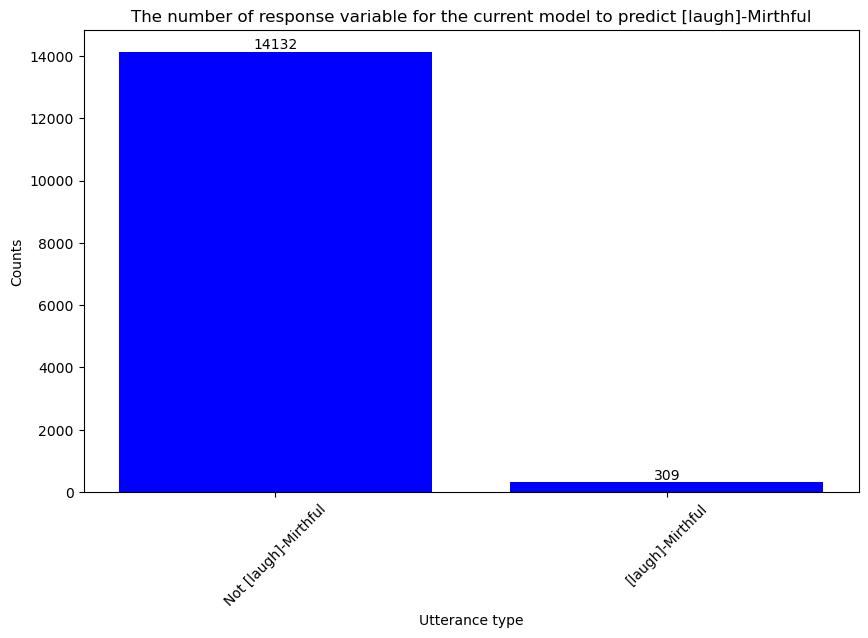

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Example list with values
values = y_binaryOperation_list

# Count each unique value using Counter and sort them in descending order
value_counts = Counter(values).most_common()

# Separate the keys (unique values) and their counts
labels, counts = zip(*value_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='blue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Utterance type')
plt.ylabel('Counts')
titleName ='The number of response variable for the current model to predict ' +utteranceType
plt.title(titleName)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
saveName =varidDurationPrefix+'DecisionTree'+utteranceType+'-quanity.png'
plt.savefig(saveName)
plt.show()


# Confusion matreix

 confusion matrix need to display consistent and alphbetally

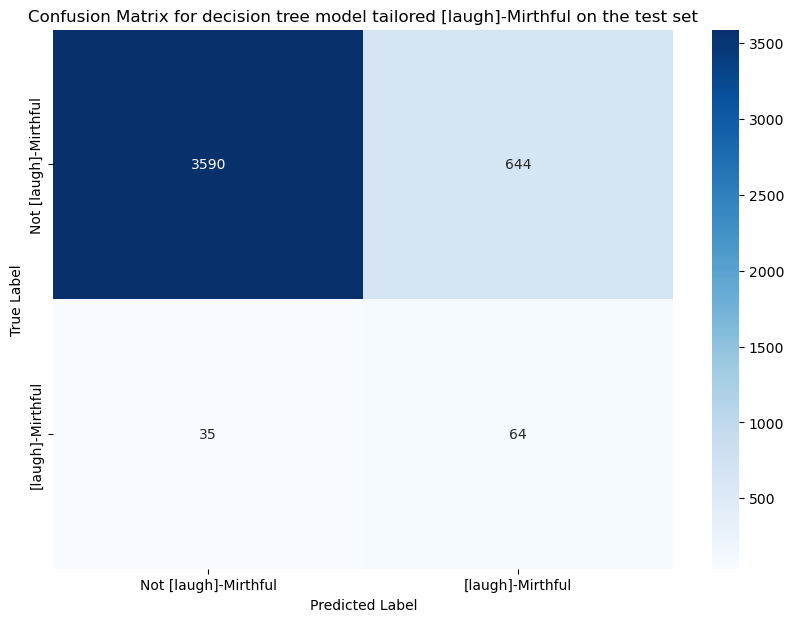

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=classNameLaughter)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classNameLaughter, yticklabels=classNameLaughter)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
title = 'Confusion Matrix for decision tree model tailored '+ utteranceType+' on the test set' 
plt.title(title)
saveName =varidDurationPrefix+'DecisionTree'+utteranceType+'-confusionMatrix.png'
plt.savefig(saveName)
plt.show()

In [20]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.12347212775510075

In [21]:
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]
classNameLaughter

['Not [laugh]-Mirthful', '[laugh]-Mirthful']

In [22]:
from sklearn import tree

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=featurelist,
                                class_names=classNameLaughter,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
saveNameD = 'DecisionTreeModel-'+varidDurationPrefix+utteranceType+'-decsion.pdf'
graph.write_pdf(saveNameD)

True

Then we need to know non-zero feature

In [23]:
feature_importances = clf.feature_importances_

    # Create a pandas series to visualize the feature importances
importances = pd.Series(feature_importances, index=X_feature.columns)
importances_sorted = importances.sort_values()
# asecnding oredr 
list_importance_value = importances_sorted.tolist()
featurelist_index_names_list = list(importances_sorted.index)

In [24]:
# https://www.geeksforgeeks.org/python-reversing-list/
# Reversing a list using slicing technique
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst
 

In [25]:
desecendingList_importanceValue = Reverse(list_importance_value)
desecendingList_importanceName = Reverse(featurelist_index_names_list)

In [26]:
# Construct the DataFrame
importanceFeatureDF_present = pd.DataFrame(desecendingList_importanceValue, index=desecendingList_importanceName, columns=['Feature importance value'])


In [27]:
topTenFeatureFeature = importanceFeatureDF_present.head(10)
topTenFeatureFeature
saveName = constnatdurationPrefix+utteranceType+"-top10Row.csv"
topTenFeatureFeature.to_csv(saveName, index=True)


In [28]:
topTenFeatureFeature

Feature importance value
mfcc_sma[2]_quartile3                                         0.546051
pcm_fftMag_spectralFlux_sma_peakMeanMeanDist                  0.183949
audSpec_Rfilt_sma_de[25]_quartile2                            0.113767
pcm_fftMag_spectralFlux_sma_de_quartile3                      0.054012
mfcc_sma[1]_quartile3                                         0.043709
mfcc_sma_de[12]_percentile99.0                                0.031009
F0final_sma_linregerrQ                                        0.027502
audSpec_Rfilt_sma_de[5]_minSegLen                             0.000000
audSpec_Rfilt_sma_de[5]_percentile99.0                        0.000000
audSpec_Rfilt_sma_de[5]_pctlrange0-1                          0.000000

In [29]:
greater_zero_featureValue = [value for value in desecendingList_importanceValue if value > 0.0]

In [30]:
sizeOfGreaterFeature = len(greater_zero_featureValue)
sizeOfGreaterFeature

7

In [31]:
featureNameTopN = desecendingList_importanceName[0:sizeOfGreaterFeature]

In [32]:
# TOPN feature N
featureNameTopN
greater_zero_featureValue

[0.5460513395335512,
 0.1839486094218343,
 0.11376720209801186,
 0.05401214800562789,
 0.0437091760566687,
 0.031009493618266274,
 0.027502031266039666]

# Stastical information for Top-N feature that is greater than 0 for feature importance

In [33]:
topFstringDF = data[featureNameTopN]

newDescribeDF = topFstringDF.describe().T
prefixInfo = constnatdurationPrefix
columns_to_drop = newDescribeDF.columns[[0,4, 6]] 
describe_final_info = newDescribeDF.drop(columns=columns_to_drop)
describe_final_info = describe_final_info.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
describe_final_info

mean    std      min     50%  \
mfcc_sma[2]_quartile3                         17.410  7.417  -24.630  18.539   
pcm_fftMag_spectralFlux_sma_peakMeanMeanDist   0.379  0.560   -1.835   0.191   
audSpec_Rfilt_sma_de[25]_quartile2            -0.002  0.007   -0.113  -0.000   
pcm_fftMag_spectralFlux_sma_de_quartile3       0.026  0.047   -0.032   0.011   
mfcc_sma[1]_quartile3                         32.114  8.586  -18.706  31.701   
mfcc_sma_de[12]_percentile99.0                 4.887  1.567   -1.809   4.670   
F0final_sma_linregerrQ                         0.057  0.036    0.000   0.052   

                                                 max  
mfcc_sma[2]_quartile3                         45.196  
pcm_fftMag_spectralFlux_sma_peakMeanMeanDist   6.293  
audSpec_Rfilt_sma_de[25]_quartile2             0.178  
pcm_fftMag_spectralFlux_sma_de_quartile3       0.759  
mfcc_sma[1]_quartile3                         57.386  
mfcc_sma_de[12]_percentile99.0                17.333  
F0final_sma_linregerrQ                         0.235

In [34]:
topNSaveName = varidDurationPrefix+utteranceType+'-topN-Stastical-inforamtion-DecisionTreeModel.csv'


describe_final_info.to_csv(topNSaveName, index=True)

# Visualisation topN 

Feature importnce for acuostic feature


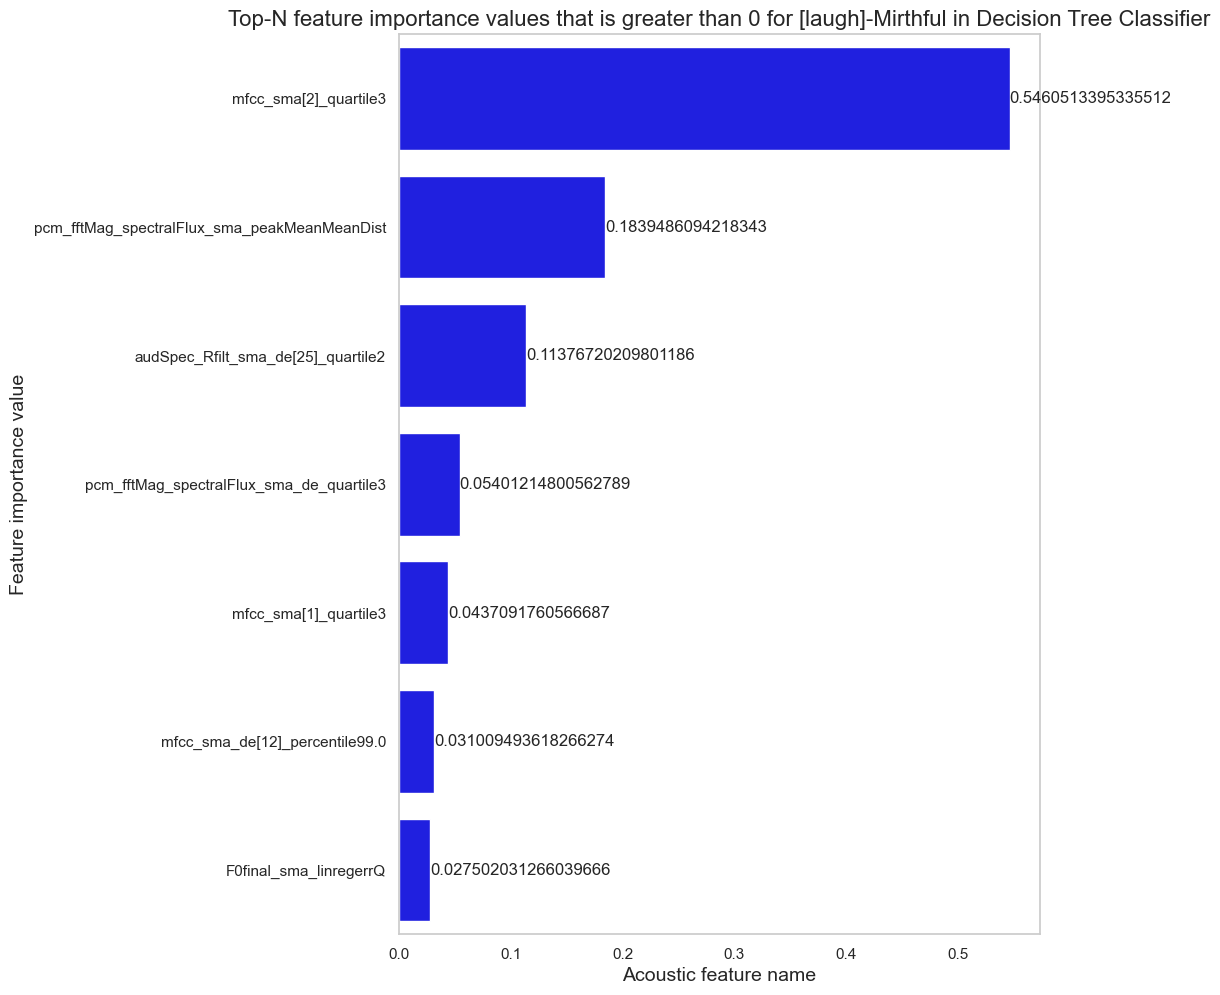

In [35]:
print("Feature importnce for acuostic feature")

    # feature imporantance calcuation
feature_importances = clf.feature_importances_

    # Create a pandas series to visualize the feature importances
importances = pd.Series(feature_importances, index=X_feature.columns)

    # Sort the features by importance
importances_sorted = importances.sort_values()
top_5_values_importance = importances_sorted.nlargest(sizeOfGreaterFeature)
list_top5_importance_value = top_5_values_importance.tolist()

topNElement = sizeOfGreaterFeature

    # Getting the index names
feature_index_names = top_5_values_importance.index
feature_index_names_list = list(feature_index_names)

lastN_features_reversedOrder = feature_index_names_list[-topNElement:]

    # -----------Plot
laughter_name = utteranceType
group_number = lastN_features_reversedOrder
num_published_venues = list_top5_importance_value
plt.figure(figsize=(8.27, 11.69))  # A4 paper size in inches (approx. 210 x 297 mm)

# Create the horizontal bar chart without grid lines, with all bars colored blue
sns.set(style="whitegrid")
sns.barplot(x=num_published_venues, y=group_number, color="blue", orient="h")
plt.grid(False)

titleName = 'Top-N feature importance values that is greater than 0 for ' + laughter_name + ' in Decision Tree Classifier'
# Add title and labels
plt.title(titleName, fontsize=16)
plt.xlabel("Acoustic feature name", fontsize=14)
plt.ylabel("Feature importance value", fontsize=14)

# Add text labels for the number of each group on each bar
for i in range(len(group_number)):
    plt.text(x=num_published_venues[i], y=i, s=str(num_published_venues[i]), ha='left', va='center',
                 fontsize=12)

saveNameImportance = "DececisionTreeModel-"+varidDurationPrefix+laughter_name + '-featureImportance.png'
# Save the plot as an image
plt.savefig(saveNameImportance)


# Show the plot
plt.show()

In [36]:
sizeOfGreaterFeature

7

#  Filling in zero before regression analysis only for varied and duration total and this code only need to run twice not more

In [37]:
X_feature_temp.fillna(0, inplace=True)

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_3403/2436762470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature_temp.fillna(0, inplace=True)


Adopt linear regression to identify which features are significant in explaining the variance in the concise merge type(response variable).

# Confirmation parametric or non-paremtric

 ## Shapiro-Wilk test to conform normality for all features

In [38]:
import numpy as np
from scipy.stats import shapiro, normaltest
alpha=0.05
featureColumnList = {}
print_result_dict = []
shapiro_list =[]
dagostino_list =[]
for index, column_name in enumerate(X_feature_temp.columns):
    feature_list = X_feature_temp[column_name].tolist()
   
    featureColumnList[column_name] =feature_list
feature_collection =[]
for key, value in featureColumnList.items():
    current_feature_list = value
    current_feature_name = key
    
    shapiro_stat, shapiro_p = shapiro(current_feature_list)
    dagostino_stat, dagostino_p = normaltest(current_feature_list)
    shapiro_list.append(shapiro_p)
    dagostino_list.append(dagostino_p)
    if shapiro_p > alpha:
        shapiro_result = 'passes Shapiro-Wilk test'
    else:
        shapiro_result = 'fails Shapiro-Wilk test'

        
    if dagostino_p > alpha:
        dagostino_result = 'passes D\'Agostino\'s K^2 test'
    else:
        dagostino_result = 'fails D\'Agostino\'s K^2 test'
        
    print_result_dict.append( {
        'Feature name': current_feature_name,
        'Shapiro-Wilk test  result':shapiro_p,
        'Shapiro-Wilk test report': shapiro_result,
         'D\'Agostino\'s K^2 test result': dagostino_p,
        'D\'Agostino\'s K^2 test report': dagostino_result
    } )
# Convert results to a DataFrame
results_normality_df = pd.DataFrame(print_result_dict)
topNSaveName = prefixInfo+utteranceType+'-feature-NormalityTest.csv'
results_normality_df.to_csv(topNSaveName, index=True)

# Visualisation of majority feature

/Users/mingshi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
results_normality_df

Feature name  Shapiro-Wilk test  result  \
0         audspec_lengthL1norm_sma_range                        0.0   
1        audspec_lengthL1norm_sma_maxPos                        0.0   
2        audspec_lengthL1norm_sma_minPos                        0.0   
3     audspec_lengthL1norm_sma_quartile1                        0.0   
4     audspec_lengthL1norm_sma_quartile2                        0.0   
...                                  ...                        ...   
6368         mfcc_sma_de[14]_minRangeRel                        0.0   
6369     mfcc_sma_de[14]_meanRisingSlope                        0.0   
6370   mfcc_sma_de[14]_stddevRisingSlope                        0.0   
6371    mfcc_sma_de[14]_meanFallingSlope                        0.0   
6372  mfcc_sma_de[14]_stddevFallingSlope                        0.0   

     Shapiro-Wilk test report  D'Agostino's K^2 test result  \
0     fails Shapiro-Wilk test                           0.0   
1     fails Shapiro-Wilk test                           0.0   
2     fails Shapiro-Wilk test                           0.0   
3     fails Shapiro-Wilk test                           0.0   
4     fails Shapiro-Wilk test                           0.0   
...                       ...                           ...   
6368  fails Shapiro-Wilk test                           0.0   
6369  fails Shapiro-Wilk test                           0.0   
6370  fails Shapiro-Wilk test                           0.0   
6371  fails Shapiro-Wilk test                           0.0   
6372  fails Shapiro-Wilk test                           0.0   

     D'Agostino's K^2 test report  
0     fails D'Agostino's K^2 test  
1     fails D'Agostino's K^2 test  
2     fails D'Agostino's K^2 test  
3     fails D'Agostino's K^2 test  
4     fails D'Agostino's K^2 test  
...                           ...  
6368  fails D'Agostino's K^2 test  
6369  fails D'Agostino's K^2 test  
6370  fails D'Agostino's K^2 test  
6371  fails D'Agostino's K^2 test  
6372  fails D'Agostino's K^2 test  

[6373 rows x 5 columns]

In [40]:
topGreater = importanceFeatureDF_present.head(sizeOfGreaterFeature)
indexOfGreater = topGreater.index
TopNgreaterList = [str(item) for item in indexOfGreater]

In [41]:
TopNgreaterList

['mfcc_sma[2]_quartile3',
 'pcm_fftMag_spectralFlux_sma_peakMeanMeanDist',
 'audSpec_Rfilt_sma_de[25]_quartile2',
 'pcm_fftMag_spectralFlux_sma_de_quartile3',
 'mfcc_sma[1]_quartile3',
 'mfcc_sma_de[12]_percentile99.0',
 'F0final_sma_linregerrQ']

In [42]:
selected_rows_signifent = results_normality_df[results_normality_df['Feature name'].isin(TopNgreaterList)]
topNSaveName = varidDurationPrefix+utteranceType+'-significantFeature-NormalityTest.csv'
selected_rows_signifent.to_csv(topNSaveName, index=True)

# Signifciant difference for the feature in the rank list

In [43]:
desecendingList_importanceName

['mfcc_sma[2]_quartile3',
 'pcm_fftMag_spectralFlux_sma_peakMeanMeanDist',
 'audSpec_Rfilt_sma_de[25]_quartile2',
 'pcm_fftMag_spectralFlux_sma_de_quartile3',
 'mfcc_sma[1]_quartile3',
 'mfcc_sma_de[12]_percentile99.0',
 'F0final_sma_linregerrQ',
 'audSpec_Rfilt_sma_de[5]_minSegLen',
 'audSpec_Rfilt_sma_de[5]_percentile99.0',
 'audSpec_Rfilt_sma_de[5]_pctlrange0-1',
 'audSpec_Rfilt_sma_de[5]_stddev',
 'audSpec_Rfilt_sma_de[5]_skewness',
 'audSpec_Rfilt_sma_de[5]_kurtosis',
 'audSpec_Rfilt_sma_de[5]_meanSegLen',
 'audSpec_Rfilt_sma_de[5]_maxSegLen',
 'audSpec_Rfilt_sma_de[5]_segLenStddev',
 'audSpec_Rfilt_sma_de[5]_iqr1-3',
 'audSpec_Rfilt_sma_de[5]_upleveltime25',
 'audSpec_Rfilt_sma_de[5]_upleveltime50',
 'audSpec_Rfilt_sma_de[5]_upleveltime75',
 'audSpec_Rfilt_sma_de[5]_upleveltime90',
 'audSpec_Rfilt_sma_de[5]_risetime',
 'audSpec_Rfilt_sma_de[5]_leftctime',
 'audSpec_Rfilt_sma_de[5]_lpgain',
 'audSpec_Rfilt_sma_de[5]_lpc0',
 'audSpec_Rfilt_sma_de[5]_lpc1',
 'audSpec_Rfilt_sma_de[5]

In [44]:
import numpy as np
import pandas as pd

import scipy.stats as stats


feature_names = desecendingList_importanceName
results = []

for i in range(len(feature_names) - 1):
    feature_1 = feature_names[i]
    feature_2 = feature_names[i + 1]
    
    feature1Name = feature_1
  #  epsilon = 1e-6
  #  f_1list_modified = f_1list + epsilon
    f_1list = X_feature_temp[feature1Name].tolist()
    
    feature2Name = feature_2
    f_2list = X_feature_temp[feature2Name].tolist()
    differences = np.array(f_1list) - np.array(f_2list)
    if np.all(differences == 0):
      print("All differences are zero. Consider alternative analyses.")
      resultfromWilT = 0
      results.append({
        'Adjancey feature 1': feature_1,
        'Adjancey feature 2': feature_2,
        'P-Value': 0
        })
    else:
      resultfromWilT = stats.wilcoxon(f_1list, f_2list, zero_method='pratt')  # or 'wilcox'
      #print(resultfromWilT)
      stast, p_value  =resultfromWilT
      results.append({
        'Adjancey feature 1': feature_1,
        'Adjancey feature 2': feature_2,
        'P-Value': p_value
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
topNSaveName = varidDurationPrefix+utteranceType+'-adjaancyFeatureSignificantlist-Wilconx-Sign-Rank-test.csv'
results_df.to_csv(topNSaveName, index=True)

# Visualize the adjancy feature 

In [45]:
results_dict = results
results_dict_first10 = results_dict[0:10]
results_dict_first10

[{'Adjancey feature 1': 'mfcc_sma[2]_quartile3',
  'Adjancey feature 2': 'pcm_fftMag_spectralFlux_sma_peakMeanMeanDist',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'pcm_fftMag_spectralFlux_sma_peakMeanMeanDist',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[25]_quartile2',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_sma_de[25]_quartile2',
  'Adjancey feature 2': 'pcm_fftMag_spectralFlux_sma_de_quartile3',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'pcm_fftMag_spectralFlux_sma_de_quartile3',
  'Adjancey feature 2': 'mfcc_sma[1]_quartile3',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'mfcc_sma[1]_quartile3',
  'Adjancey feature 2': 'mfcc_sma_de[12]_percentile99.0',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'mfcc_sma_de[12]_percentile99.0',
  'Adjancey feature 2': 'F0final_sma_linregerrQ',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'F0final_sma_linregerrQ',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[5]_minSegLen',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_

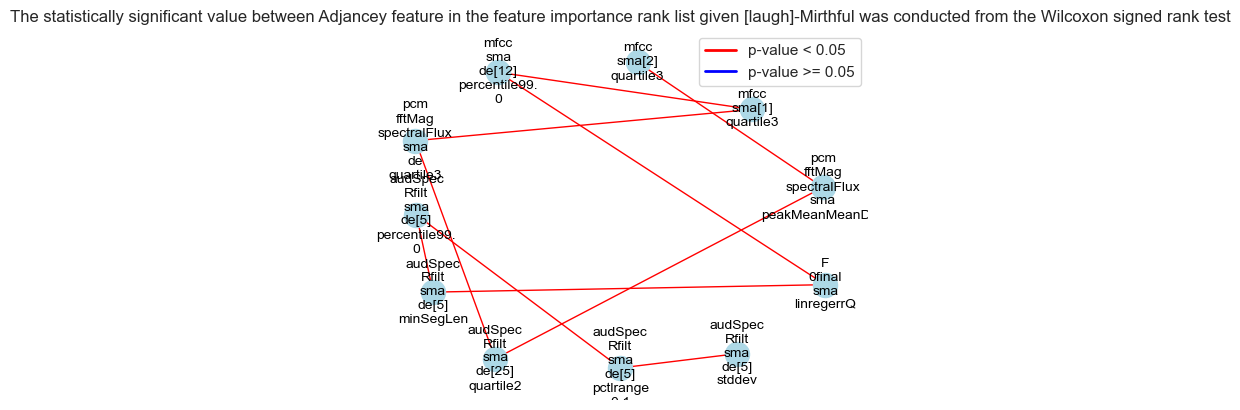

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend

# Initialize the graph
G = nx.Graph()

# Constants for column names
# Constants for column names
feature1Name = 'Adjancey feature 1'
feature2Name = 'Adjancey feature 2'
p_value_name = 'P-Value'

# Assume 'results_dict' is predefined and contains your data

for entry in results_dict_first10:
    feature1 = entry[feature1Name]
    feature2 = entry[feature2Name]
    p_value = entry[p_value_name]
  

      # Add edges with colors based on p-value
    edge_color = 'red' if p_value < 0.05 else 'blue'  # Red for significant, blue for non-significant
    G.add_edge(feature1, feature2, weight=p_value, color=edge_color)
        
    # Add edges with colors based on p-value
    edge_color = 'red' if p_value < 0.05 else 'blue'  # Red for significant, blue for non-significant
    G.add_edge(feature1, feature2, weight=p_value, color=edge_color)

# Node positions using a spring layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

# Draw edges, differentiating by color
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors)

# Draw labels for nodes
node_labels = {node: '\n'.join(node.split('_')).replace('0', '\n0') for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Add legend
legend_elements = [Line2D([0], [0], color='red', lw=2, label='p-value < 0.05'),
                   Line2D([0], [0], color='blue', lw=2, label='p-value >= 0.05')]
plt.legend(handles=legend_elements, loc='upper right')

TitleName = 'The statistically significant value between Adjancey feature in the feature importance rank list given '+utteranceType+' was conducted from the Wilcoxon signed rank test'
plt.title(TitleName)
plt.axis('off')
topNSaveName = 'DecisionTree-'+varidDurationPrefix+utteranceType+'-adjaancyFeatureGraphFeature.png'
plt.savefig(topNSaveName, format='png', bbox_inches='tight')
